In [18]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats


In [19]:
# Step 1: Load the Data
print("Step 1: Loading the data...")
# Replace with your actual file path
df = pd.read_csv(r"C:\Users\sonun\OneDrive\Desktop\Video_Game_Analysis\Video Game Sales.csv", encoding='latin1')
# Display the first few rows of the dataset
print("Data loaded successfully!")
print("\nFirst 5 rows of the dataset:\n", df.head())

Step 1: Loading the data...
Data loaded successfully!

First 5 rows of the dataset:
                                              img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter     

In [20]:
# Step 2: Data Cleaning
print("\n--- Data Cleaning ---")

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


--- Data Cleaning ---

Missing values:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [24]:
# Fill missing numeric values with 0 (e.g., sales and critic score)
numeric_columns = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df[numeric_columns] = df[numeric_columns].fillna(0)

In [26]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Check data types
print("\nData types:\n", df.dtypes)


Data types:
 img                     object
title                   object
console                 object
genre                   object
publisher               object
developer               object
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    datetime64[ns]
last_update             object
dtype: object


In [28]:
# Remove duplicates if any
df = df.drop_duplicates()
print("\nNumber of duplicates removed:", len(df) - len(df.drop_duplicates()))



Number of duplicates removed: 0


In [30]:
# Step 3: Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis ---")

# Summary statistics for numeric columns
print("\nSummary Statistics:\n", df[numeric_columns].describe())


--- Exploratory Data Analysis ---

Summary Statistics:
        critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       0.753220      0.103192      0.052261      0.010746      0.029943   
std        2.256713      0.466999      0.243780      0.063067      0.185641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.020000      0.000000      0.000000      0.000000   
max       10.000000     20.320000      9.760000      2.130000      9.850000   

        other_sales  
count  64016.000000  
mean       0.010171  
std        0.064221  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.120000  


In [32]:
# Total sales by genre
print("\nTotal Sales by Genre:\n", df.groupby('genre')['total_sales'].sum().sort_values(ascending=False))


Total Sales by Genre:
 genre
Sports              1187.51
Action              1125.89
Shooter              995.50
Misc                 557.79
Racing               525.75
Role-Playing         426.80
Platform             349.15
Fighting             341.13
Adventure            325.39
Simulation           300.65
Action-Adventure     148.52
Puzzle               127.28
Strategy             118.31
Music                 51.75
MMO                    9.31
Party                  6.21
Visual Novel           5.78
Sandbox                1.89
Education              0.97
Board Game             0.33
Name: total_sales, dtype: float64


In [34]:
# Total sales by publisher
print("\nTop 10 Publishers by Total Sales:\n", df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10))


Top 10 Publishers by Total Sales:
 publisher
Activision                     722.77
Electronic Arts                644.13
EA Sports                      485.66
Ubisoft                        462.57
THQ                            320.89
Sony Computer Entertainment    311.08
Rockstar Games                 239.67
Konami                         210.70
Sega                           206.38
Nintendo                       140.80
Name: total_sales, dtype: float64


In [36]:
# Games released per year
df['release_year'] = df['release_date'].dt.year
print("\nNumber of Games Released per Year:\n", df['release_year'].value_counts().sort_index())


Number of Games Released per Year:
 release_year
1971.0       1
1973.0       1
1975.0       1
1977.0      11
1978.0      45
1979.0       8
1980.0      35
1981.0      50
1982.0     214
1983.0     298
1984.0     102
1985.0     101
1986.0     159
1987.0     270
1988.0     294
1989.0     426
1990.0     657
1991.0     779
1992.0     933
1993.0    1034
1994.0    1163
1995.0    1153
1996.0    1228
1997.0    1040
1998.0    1096
1999.0    1272
2000.0    1552
2001.0    1478
2002.0    1726
2003.0    1723
2004.0    1606
2005.0    1810
2006.0    2096
2007.0    2525
2008.0    2936
2009.0    4360
2010.0    3586
2011.0    3386
2012.0    1584
2013.0    1740
2014.0    2896
2015.0    1680
2016.0    1352
2017.0    1558
2018.0    1538
2019.0    1290
2020.0    1452
2021.0     422
2022.0     168
2023.0     108
2024.0      22
Name: count, dtype: int64


In [38]:
# Top 10 games by total sales
print("\nTop 10 Games by Total Sales:\n", df[['title', 'total_sales']].sort_values(by='total_sales', ascending=False).head(10))


Top 10 Games by Total Sales:
                             title  total_sales
0              Grand Theft Auto V        20.32
1              Grand Theft Auto V        19.39
2     Grand Theft Auto: Vice City        16.15
3              Grand Theft Auto V        15.86
4       Call of Duty: Black Ops 3        15.09
5  Call of Duty: Modern Warfare 3        14.82
6         Call of Duty: Black Ops        14.74
7           Red Dead Redemption 2        13.94
8      Call of Duty: Black Ops II        13.86
9      Call of Duty: Black Ops II        13.80



--- Visualizations ---


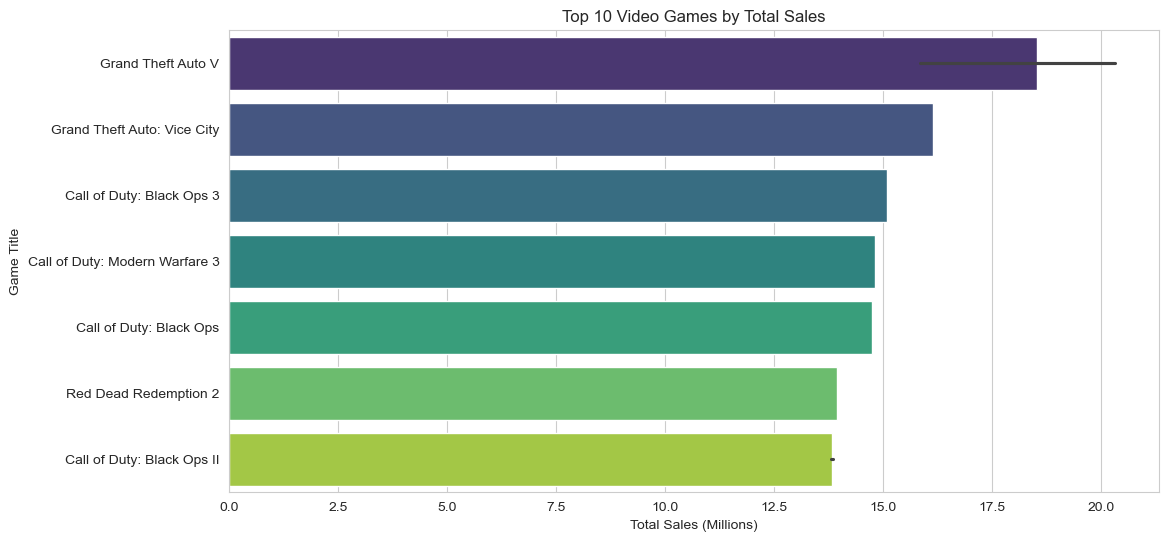

In [44]:
# Step 4: Visualizations
print("\n--- Visualizations ---")
sns.set_style("whitegrid")

# Bar chart for top 10 games by total sales
plt.figure(figsize=(12, 6))
top_10_games = df.nlargest(10, 'total_sales')
sns.barplot(x='total_sales', y='title', data=top_10_games, hue='title', palette='viridis', legend=False)
plt.title('Top 10 Video Games by Total Sales')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Game Title')
plt.show()

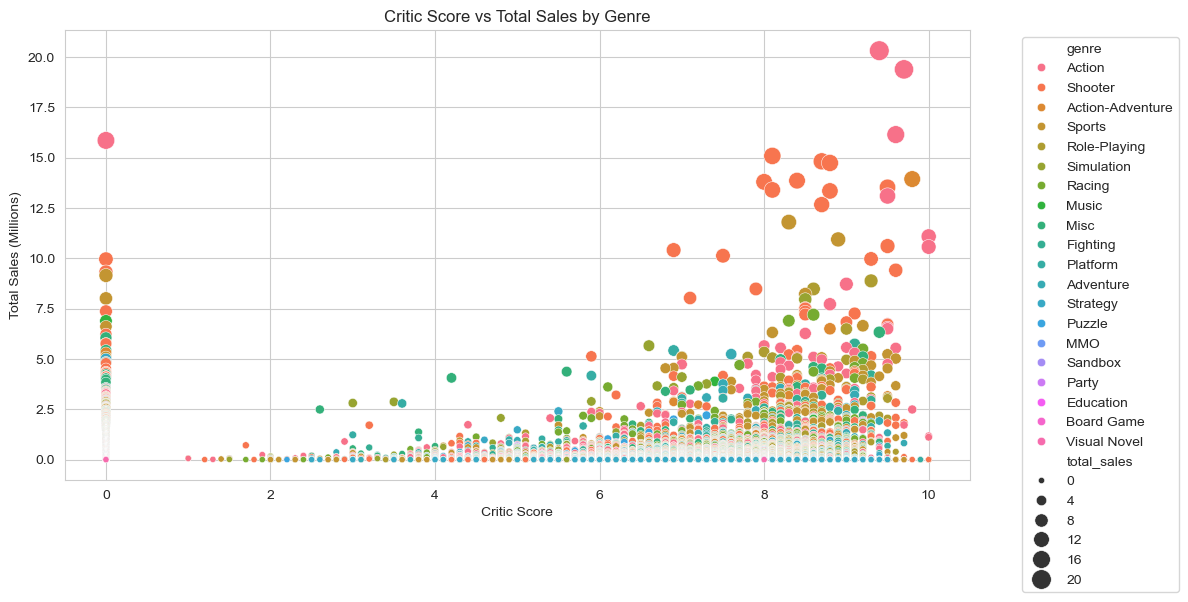

In [46]:
# Scatter plot for critic score vs total sales by genre
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', hue='genre', size='total_sales', data=df, sizes=(20, 200))
plt.title('Critic Score vs Total Sales by Genre')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

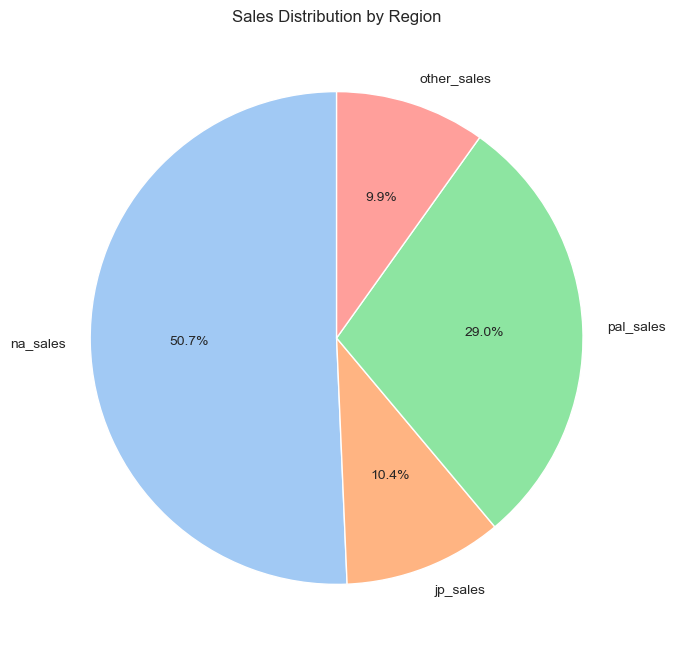

In [48]:
# Pie chart for sales distribution by region
plt.figure(figsize=(8, 8))
region_sales = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.show()

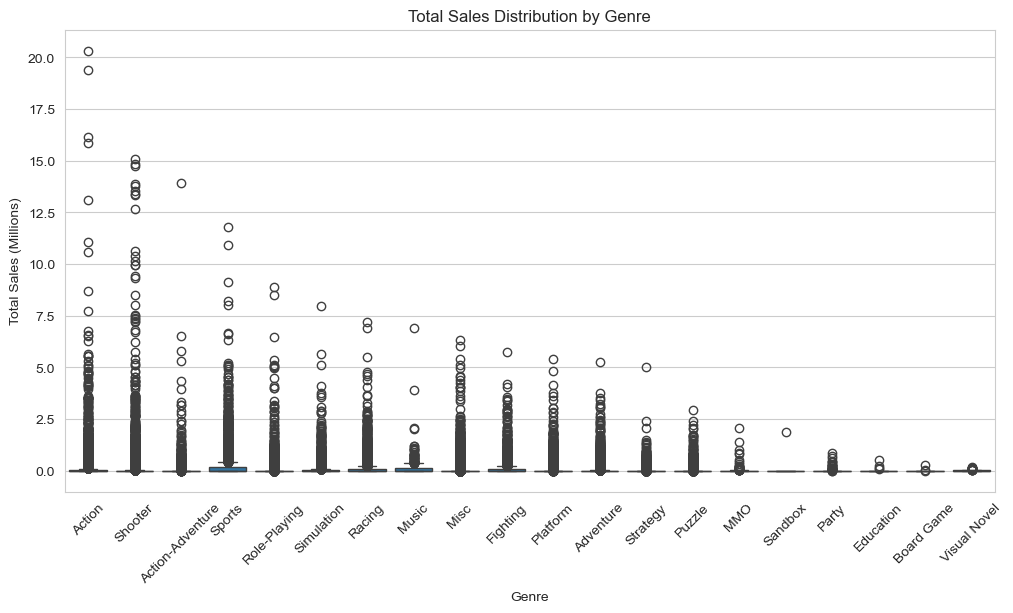

In [50]:
# Box plot for total sales by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=df)
plt.title('Total Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


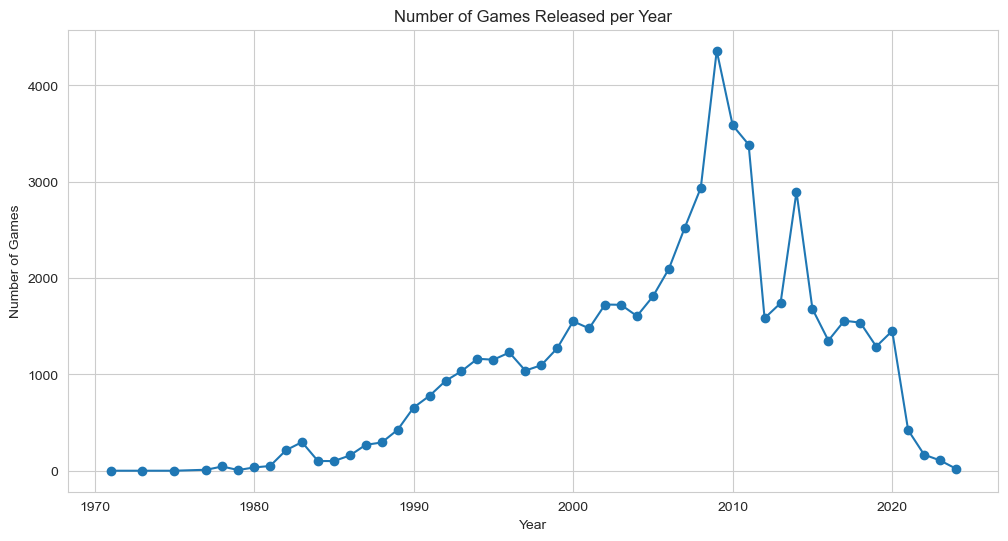

In [52]:
# Line plot for games released over time
plt.figure(figsize=(12, 6))
games_per_year = df['release_year'].value_counts().sort_index()
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

In [54]:
# Step 5: Save the Cleaned Data
df.to_csv('cleaned_game_sales.csv', index=False)
print("\nCleaned data saved to 'cleaned_game_sales.csv'")


Cleaned data saved to 'cleaned_game_sales.csv'



--- Additional Insights ---


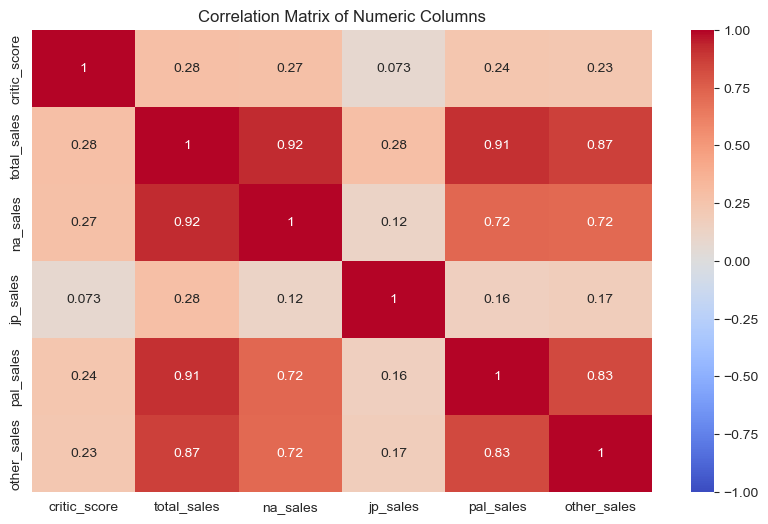

In [56]:
# Step 6: Additional Insights
print("\n--- Additional Insights ---")
# Correlation matrix for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [58]:
# Z-Score Calculation for total_sales
print("\nZ-Score Analysis for Total Sales:")
df['z_score_total_sales'] = stats.zscore(df['total_sales'])
print(df[['title', 'total_sales', 'z_score_total_sales']].head(10))
print("\nGames with Z-Score > 3 (Outliers):")
print(df[df['z_score_total_sales'] > 3][['title', 'total_sales', 'z_score_total_sales']])


Z-Score Analysis for Total Sales:
                            title  total_sales  z_score_total_sales
0              Grand Theft Auto V        20.32            43.291200
1              Grand Theft Auto V        19.39            41.299748
2     Grand Theft Auto: Vice City        16.15            34.361784
3              Grand Theft Auto V        15.86            33.740793
4       Call of Duty: Black Ops 3        15.09            32.091956
5  Call of Duty: Modern Warfare 3        14.82            31.513792
6         Call of Duty: Black Ops        14.74            31.342484
7           Red Dead Redemption 2        13.94            29.629407
8      Call of Duty: Black Ops II        13.86            29.458099
9      Call of Duty: Black Ops II        13.80            29.329618

Games with Z-Score > 3 (Outliers):
                               title  total_sales  z_score_total_sales
0                 Grand Theft Auto V        20.32            43.291200
1                 Grand Theft Auto V   

In [60]:
# T-Test: Compare total_sales between two genres (e.g., Action vs. Sports)
print("\nT-Test: Comparing Total Sales between Action and Sports Genres...")
action_sales = df[df['genre'] == 'Action']['total_sales'].dropna()
sports_sales = df[df['genre'] == 'Sports']['total_sales'].dropna()
t_stat, p_val = stats.ttest_ind(action_sales, sports_sales, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Significant difference between Action and Sports total sales.")
else:
    print("Result: No significant difference between Action and Sports total sales.")


T-Test: Comparing Total Sales between Action and Sports Genres...
T-Statistic: -7.7403
P-Value: 0.0000
Result: Significant difference between Action and Sports total sales.


In [62]:
# Z-Test: Example (assuming population mean and std for total_sales)
print("\nZ-Test: Testing if average total_sales differs from a hypothetical mean (e.g., 5 million)...")
hypothetical_mean = 5
population_std = df['total_sales'].std()
sample_mean = df['total_sales'].mean()
n = len(df['total_sales'])
z_score = (sample_mean - hypothetical_mean) / (population_std / np.sqrt(n))
print(f"Z-Score: {z_score:.4f}")
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject the null hypothesis (average total_sales differs from 5 million).")
else:
    print("Result: Fail to reject the null hypothesis (average total_sales is around 5 million).")

print("\nAnalysis completed!")


Z-Test: Testing if average total_sales differs from a hypothetical mean (e.g., 5 million)...
Z-Score: -2653.0230
P-Value: 0.0000
Result: Reject the null hypothesis (average total_sales differs from 5 million).

Analysis completed!
